In [31]:
from hydra import compose, initialize
from pathlib import Path
import pandas as pd
import numpy as np
from rdkit import Chem
from IPython.display import SVG
import matplotlib.pyplot as plt
from ergochemics.draw import draw_molecule
from collections import defaultdict
from scipy.stats import hmean, gmean # Keep
from ergochemics.mapping import rc_to_nest

with initialize(version_base=None, config_path="../configs/filepaths"):
    filepaths = compose(config_name="filepaths")

In [32]:
# Load

rule_id = 837
embed_mat = np.load(Path(filepaths.interim_data) / str(rule_id) / 'bfm.npy')
examples = pd.read_parquet(Path(filepaths.interim_data) / str(rule_id) / 'subgraph_instances.parquet')

In [33]:
# Transform

p1 = embed_mat.sum(axis=0) / embed_mat.shape[0]
sgids = np.argsort(p1)[::-1]
examples['reaction_center'] = examples['reaction_center'].apply(rc_to_nest)
examples.head()

,subgraph_id,rxn_id,smarts,am_smarts,reaction_center,sg_idxs,sep_sg_idxs
0,0,11151,CC(O)C(N)C(=O)O.O=CCF>>NC(C(=O)O)C(O)CF.CC=O,[CH3:12][CH:10]([OH:11])[CH:1]([NH2:4])[C:5](=...,"(((3, 1, 2), (1, 0)), ((0, 1, 2), (0, 1)))",[3],3;>>
1,1,11151,CC(O)C(N)C(=O)O.O=CCF>>NC(C(=O)O)C(O)CF.CC=O,[CH3:12][CH:10]([OH:11])[CH:1]([NH2:4])[C:5](=...,"(((3, 1, 2), (1, 0)), ((0, 1, 2), (0, 1)))",[5],5;>>
2,2,11151,CC(O)C(N)C(=O)O.O=CCF>>NC(C(=O)O)C(O)CF.CC=O,[CH3:12][CH:10]([OH:11])[CH:1]([NH2:4])[C:5](=...,"(((3, 1, 2), (1, 0)), ((0, 1, 2), (0, 1)))",[11],;3>>
3,3,11151,CC(O)C(N)C(=O)O.O=CCF>>NC(C(=O)O)C(O)CF.CC=O,[CH3:12][CH:10]([OH:11])[CH:1]([NH2:4])[C:5](=...,"(((3, 1, 2), (1, 0)), ((0, 1, 2), (0, 1)))",[8],;0>>
4,4,11151,CC(O)C(N)C(=O)O.O=CCF>>NC(C(=O)O)C(O)CF.CC=O,[CH3:12][CH:10]([OH:11])[CH:1]([NH2:4])[C:5](=...,"(((3, 1, 2), (1, 0)), ((0, 1, 2), (0, 1)))",[4],4;>>


Top subgraphs over all reactions in subset

Subgraph id: 8
Probability: 1.00
Example shown: 11151


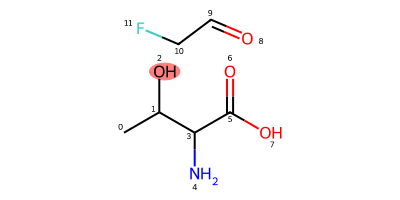

Subgraph id: 3
Probability: 1.00
Example shown: 11151


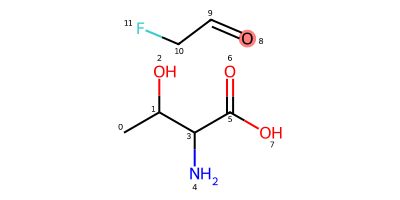

Subgraph id: 15
Probability: 0.75
Example shown: 13393


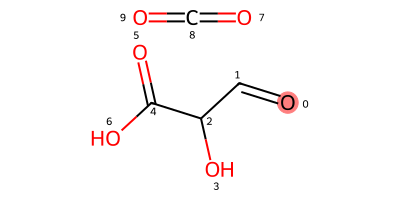

Subgraph id: 10
Probability: 0.62
Example shown: 11151


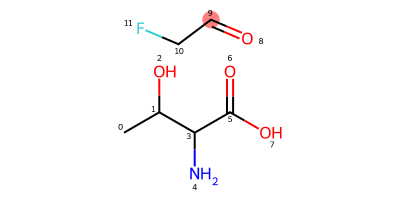

Subgraph id: 5
Probability: 0.62
Example shown: 11151


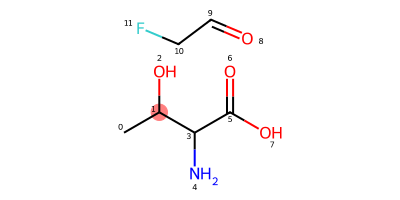

Subgraph id: 92
Probability: 0.62
Example shown: 1480


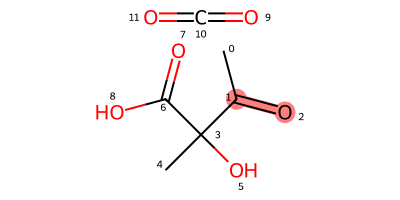

Subgraph id: 84
Probability: 0.62
Example shown: 11151


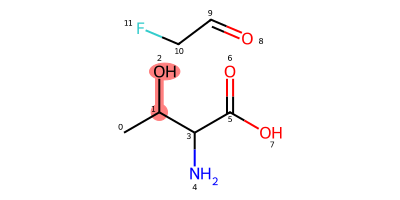

Subgraph id: 81
Probability: 0.62
Example shown: 11151


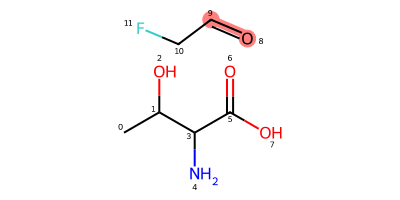

Subgraph id: 19
Probability: 0.62
Example shown: 1480


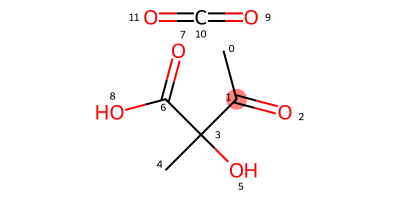

Subgraph id: 32
Probability: 0.38
Example shown: 1520


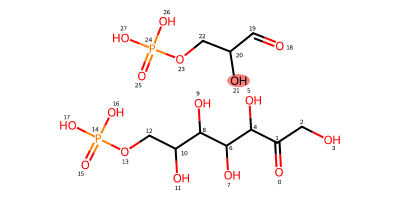

Subgraph id: 21
Probability: 0.38
Example shown: 1480


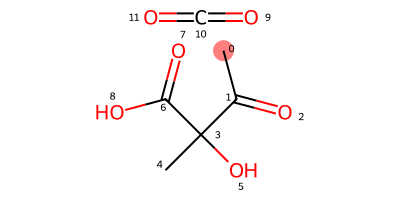

In [34]:
topk = 10

ct = 0
for sgid in sgids:
    if ct > topk:
        break

    # if p1[sgid] == 1:
    #     continue

    ex = examples.loc[examples['subgraph_id'] == sgid].iloc[0]
    sma = ex['smarts']
    rcts = sma.split('>>')[0]
    rcts = Chem.MolFromSmiles(rcts)
    sg_idxs = ex['sg_idxs'].tolist()
    print(f"Subgraph id: {sgid}")
    print(f"Probability: {p1[sgid]:.2f}")
    print(f"Example shown: {ex['rxn_id']}")
    img = draw_molecule(rcts, size=(400, 200), highlight_atoms=sg_idxs, draw_options={"addAtomIndices": True})
    display(SVG(img))

    # with open(Path(filepaths.artifacts) / "imgs" / "top_sgs_v0" / f"p_{p1[sgid]*100:.0f}_sg_{sgid}_ex_{ex['rxn_id']}.svg", 'w') as f:
    #     f.write(img)

    ct += 1
    

Top subgraphs for given reaction

In [46]:
rxn_id = 641
len(examples.loc[examples['rxn_id'] == str(rxn_id)])
examples.loc[examples['rxn_id'] == str(rxn_id)].head()

,subgraph_id,rxn_id,smarts,am_smarts,reaction_center,sg_idxs,sep_sg_idxs
459,19,641,CC(=O)C(=O)O.CC(=O)C(=O)O>>CC(=O)C(C)(O)C(=O)O...,[CH3:4][C:1](=[O:5])[C:10](=[O:12])[OH:11].[CH...,"(((1, 3, 5), (1, 2)), ((0, 1, 2), (0, 1)))",[1],1;>>
460,21,641,CC(=O)C(=O)O.CC(=O)C(=O)O>>CC(=O)C(C)(O)C(=O)O...,[CH3:4][C:1](=[O:5])[C:10](=[O:12])[OH:11].[CH...,"(((1, 3, 5), (1, 2)), ((0, 1, 2), (0, 1)))",[0],0;>>
461,32,641,CC(=O)C(=O)O.CC(=O)C(=O)O>>CC(=O)C(C)(O)C(=O)O...,[CH3:4][C:1](=[O:5])[C:10](=[O:12])[OH:11].[CH...,"(((1, 3, 5), (1, 2)), ((0, 1, 2), (0, 1)))",[11],;5>>
462,40,641,CC(=O)C(=O)O.CC(=O)C(=O)O>>CC(=O)C(C)(O)C(=O)O...,[CH3:4][C:1](=[O:5])[C:10](=[O:12])[OH:11].[CH...,"(((1, 3, 5), (1, 2)), ((0, 1, 2), (0, 1)))",[6],;0>>
463,15,641,CC(=O)C(=O)O.CC(=O)C(=O)O>>CC(=O)C(C)(O)C(=O)O...,[CH3:4][C:1](=[O:5])[C:10](=[O:12])[OH:11].[CH...,"(((1, 3, 5), (1, 2)), ((0, 1, 2), (0, 1)))",[2],2;>>


Subgraph id: 8
Probability: 1.00


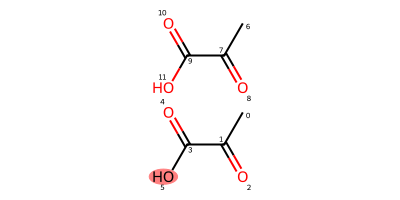

Subgraph id: 3
Probability: 1.00


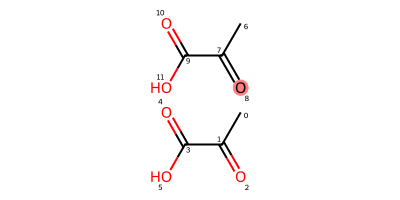

Subgraph id: 15
Probability: 0.75


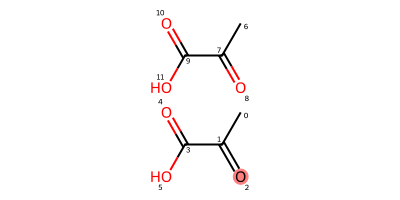

Subgraph id: 19
Probability: 0.62


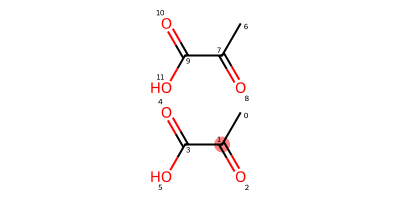

Subgraph id: 92
Probability: 0.62


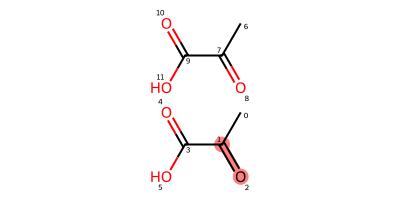

Subgraph id: 21
Probability: 0.38


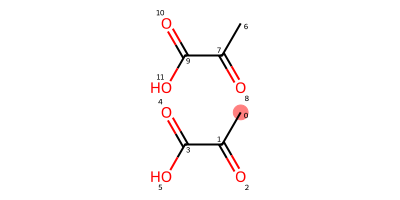

Subgraph id: 32
Probability: 0.38


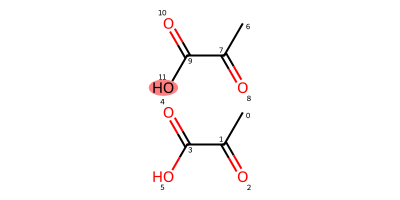

Subgraph id: 95
Probability: 0.38


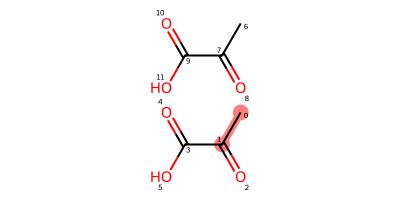

Subgraph id: 63
Probability: 0.31


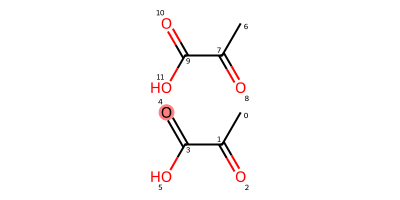

Subgraph id: 62
Probability: 0.31


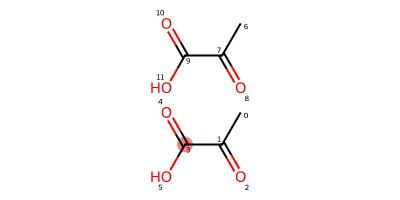

In [47]:
topk = 10
ct = 0
atom_probs = defaultdict(list)
rxn_of_interest = examples.loc[examples['rxn_id'] == str(rxn_id)].sort_values(by='subgraph_id', key=lambda x: p1[x], ascending=False)
for i, subgraph in rxn_of_interest.iterrows():
    sma = subgraph['smarts']
    sgid = subgraph["subgraph_id"]
    sg_idxs = subgraph['sg_idxs'].tolist()
    
    for idx in sg_idxs:
        atom_probs[idx].append(p1[sgid])

    if ct < topk:
        rcts = sma.split('>>')[0]
        rcts = Chem.MolFromSmiles(rcts)
        print(f"Subgraph id: {sgid}")
        print(f"Probability: {p1[sgid]:.2f}")
        img = draw_molecule(rcts, size=(400, 200), highlight_atoms=sg_idxs, draw_options={"addAtomIndices": True})
        display(SVG(img))

        # with open(Path(filepaths.artifacts) / "imgs" / "ex_decarb_top_sgs" / f"rxn_{rxn_id}_p_{p1[sgid]*100:.0f}_sg_{sgid}.svg", 'w') as f:
        #     f.write(img)
    
    
    ct += 1

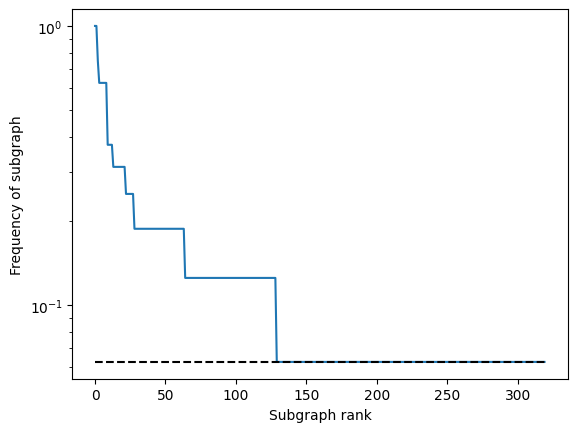

In [37]:
fig, ax = plt.subplots()
ax.plot(np.sort(p1)[::-1])
ax.hlines(1 / embed_mat.shape[0], 0, embed_mat.shape[1], colors='black', linestyles='--')
ax.set_yscale('log')
ax.set_xlabel('Subgraph rank')
ax.set_ylabel('Frequency of subgraph')
plt.show()

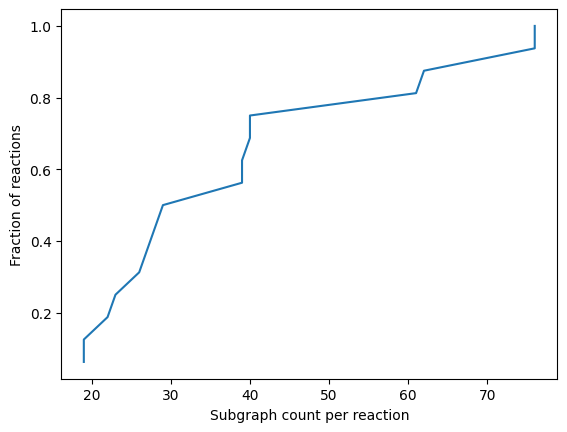

In [38]:
sg_cts = embed_mat.sum(axis=1)
srt_sg_cts = np.sort(sg_cts)
ycdf = np.arange(1, len(srt_sg_cts) + 1) / len(srt_sg_cts)
fig, ax = plt.subplots()
ax.plot(srt_sg_cts, ycdf)
ax.set_xlabel('Subgraph count per reaction')
ax.set_ylabel('Fraction of reactions')
plt.show()


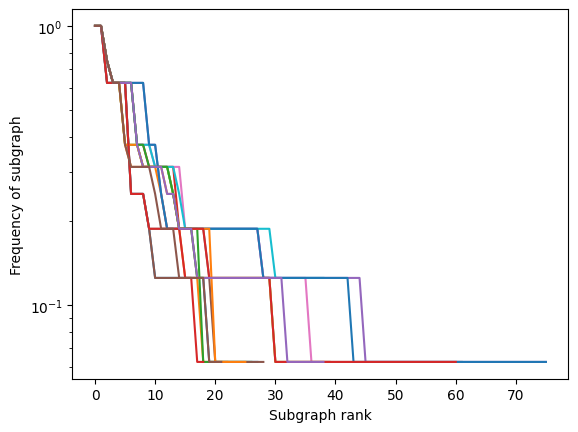

In [39]:
sgids_by_rxn = [np.nonzero(embed_mat[i])[0] for i in range(embed_mat.shape[0])]

fig, ax = plt.subplots()
for row in sgids_by_rxn:
    row_probs = np.sort(p1[row])[::-1]
    ax.plot(row_probs)

ax.set_yscale('log')
ax.set_xlabel('Subgraph rank')
ax.set_ylabel('Frequency of subgraph')
plt.show()

Select atoms apart of union of subgraphs > threshold on frequency

Example shown: 11151


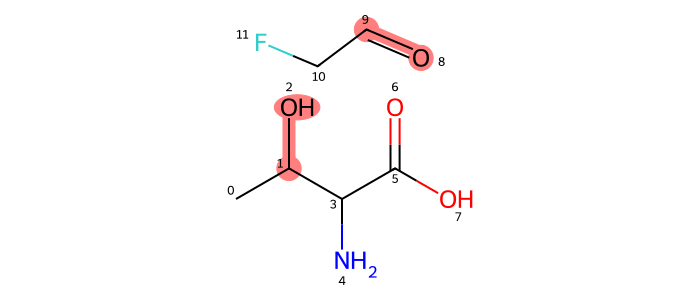

Example shown: 13393


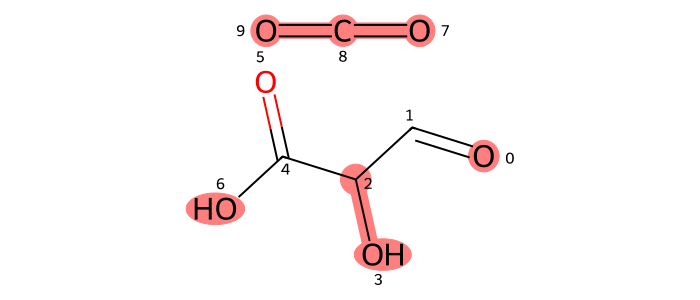

Example shown: 1480


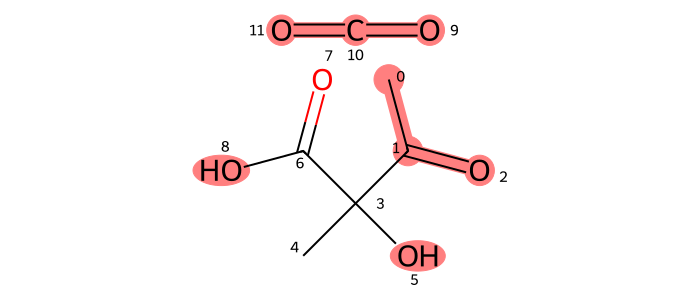

Example shown: 15175


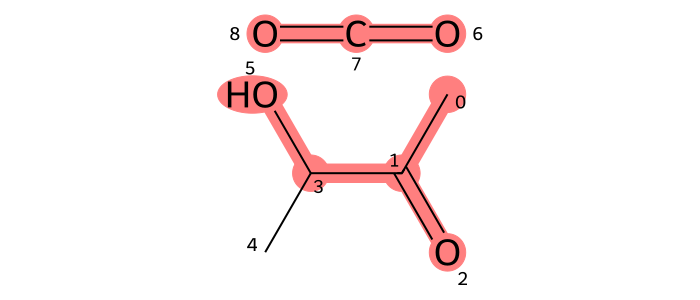

Example shown: 1520


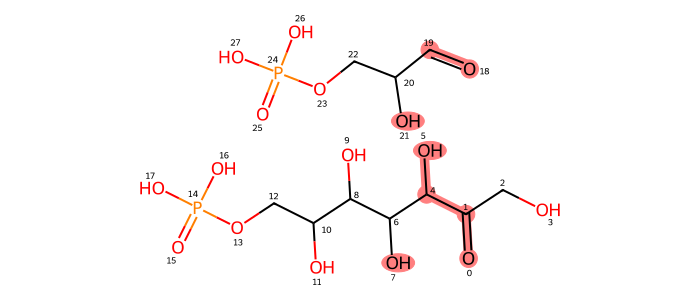

Example shown: 16547


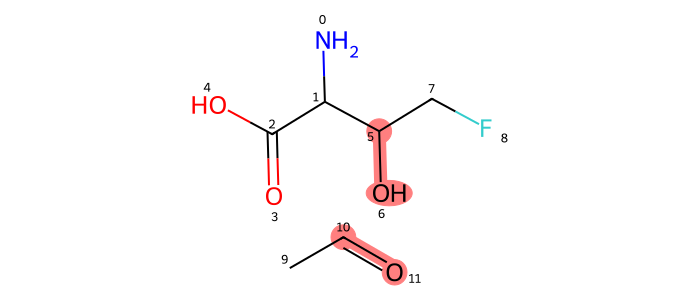

Example shown: 3218


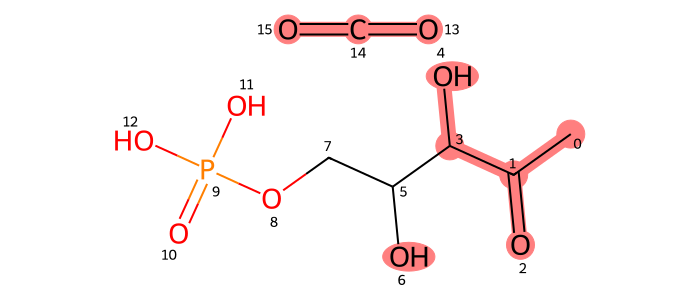

Example shown: 3229


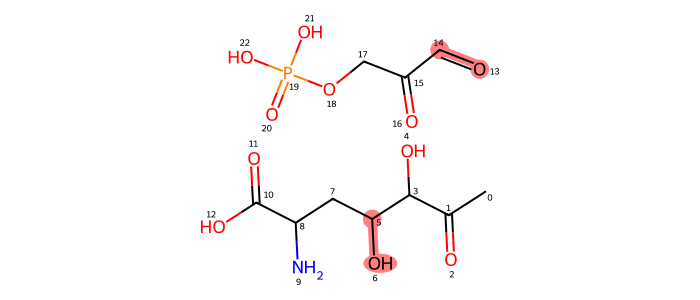

Example shown: 4218


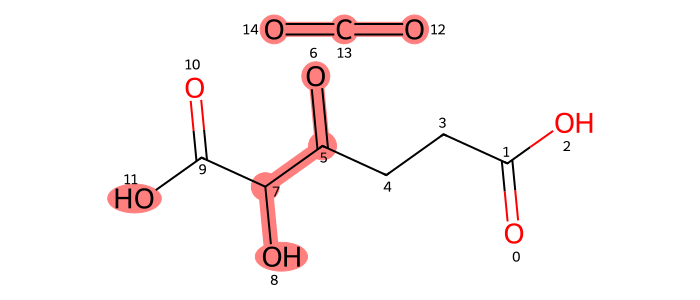

Example shown: 460


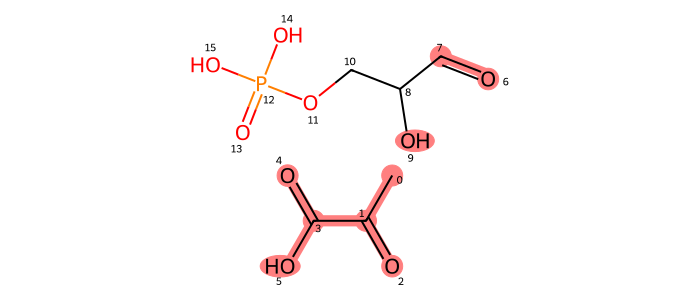

Example shown: 5468


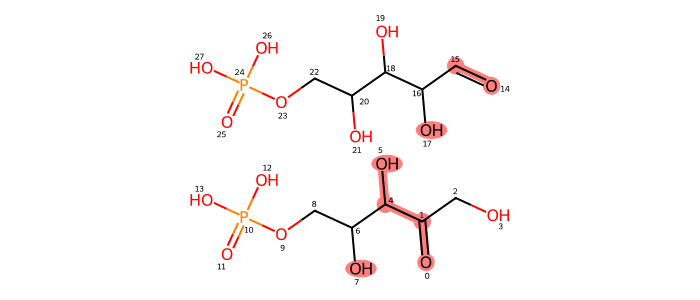

Example shown: 641


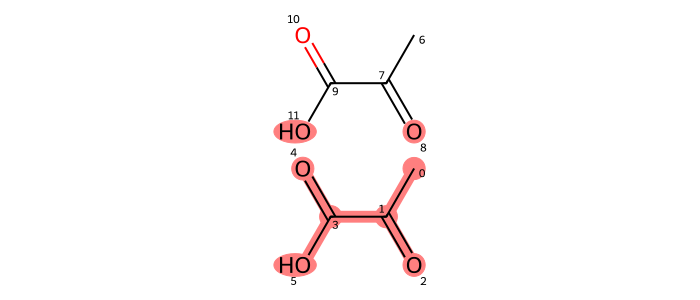

Example shown: 6852


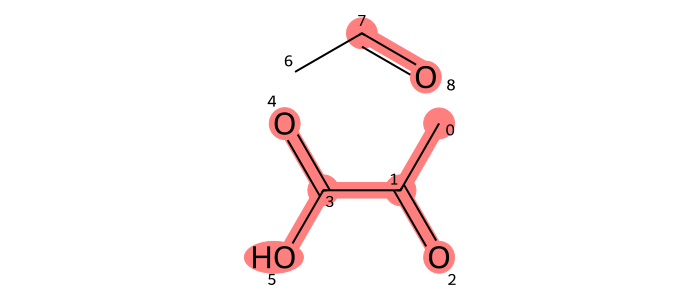

Example shown: 9235


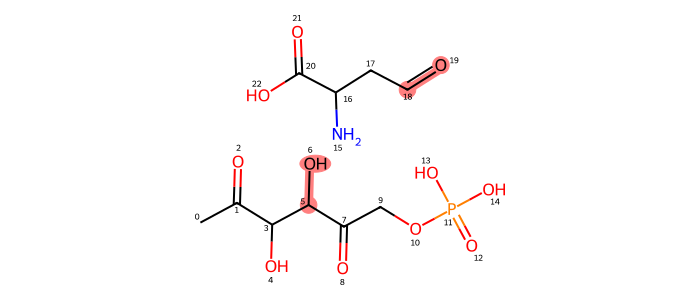

Example shown: 9304


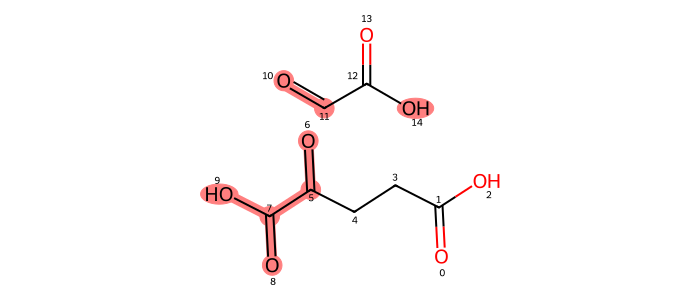

Example shown: 9990


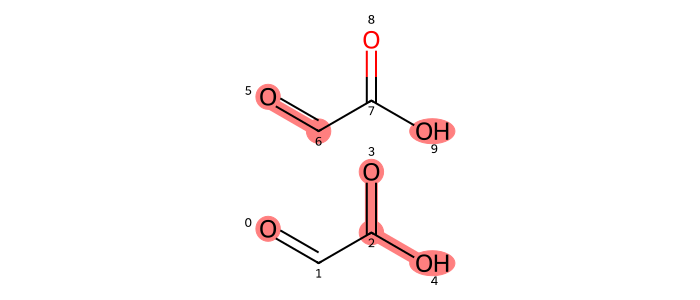

In [49]:
scl = 5
lb = scl / embed_mat.shape[0]
stop = 23

for i, (name, gb) in enumerate(examples.groupby(by="rxn_id")):
    smarts = gb.iloc[0]['smarts']
    rcts = smarts.split('>>')[0]
    rcts = Chem.MolFromSmiles(rcts)
    
    sg_idxs = set()
    for _, row in gb.iterrows():
        if p1[row['subgraph_id']] >= lb:
            sg_idxs.update(row['sg_idxs'].tolist())

    print(f"Example shown: {name}")
    display(SVG(draw_molecule(rcts, size=(700, 300), highlight_atoms=sg_idxs, draw_options={"addAtomIndices": True})))

    i += 1

    if i > stop:
        break

Select by probability of each atom

In [41]:
# aggs = {
#     "arithmetic": np.mean,
#     "harmonic": hmean,
#     "geometric": gmean,
#     "max": np.max
# }

# fig, ax = plt.subplots(ncols=1, nrows=len(aggs), figsize=(7, 9))   
# for i, (agg, func) in enumerate(aggs.items()):
#     for idx, probs in atom_probs.items():
#         ax[i].bar(idx, func(probs))
#     ax[i].set_title(agg)
#     ax[i].set_xticks(np.arange(len(atom_probs)))
#     ax[i].grid()
# plt.tight_layout()
# plt.show()

In [42]:
# all_atom_probs = defaultdict(list)
# for _, row in examples.iterrows():
#     rxn_id = row['rxn_id']
#     sgid = row['subgraph_id']
#     for aidx in row['sg_idxs']:
#         all_atom_probs[f"{rxn_id}_{aidx}"].append(p1[sgid])

# mean_probs = []
# for i, (agg, func) in enumerate(aggs.items()):
#     for idx, probs in all_atom_probs.items():
#         mean_probs.append(func(probs))
#     fig, ax = plt.subplots()
#     ycdf = np.arange(1, len(mean_probs) + 1) / len(mean_probs)
#     ax.plot(np.sort(mean_probs), ycdf)
#     ax.grid()
#     ax.set_title(agg)
#     plt.show()

Visualize single sgid over multiple 

In [43]:
sgid = 730
ct = 0
for i, ex in examples.loc[examples['subgraph_id'] == sgid].iterrows():
    if ct > 4:
        break

    sma = ex['smarts']
    rcts = sma.split('>>')[0]
    rcts = Chem.MolFromSmiles(rcts)
    sg_idxs = ex['sg_idxs'].tolist()
    print(f"Subgraph id: {sgid}")
    print(f"Probability: {p1[sgid]:.2f}")
    display(SVG(draw_molecule(rcts, size=(400, 200), highlight_atoms=sg_idxs, draw_options={"addAtomIndices": True})))
    
    ct +=1

In [44]:
# agg = aggs['max']
# lb = 0.15

# for name, gb in examples.groupby(by="rxn_id"):
#     smarts = gb.iloc[0]['smarts']
#     rcts = smarts.split('>>')[0]
#     rcts = Chem.MolFromSmiles(rcts)
#     aidxs = [atom.GetIdx() for atom in rcts.GetAtoms()]
#     sg_idxs = [elt for elt in aidxs if agg(all_atom_probs[f"{name}_{elt}"]) > lb]
#     print(sorted(sg_idxs, key=lambda x: agg(all_atom_probs[f"{name}_{x}"]), reverse=True))
#     print(f"Example shown: {name}")
#     display(SVG(draw_molecule(rcts, size=(400, 200), highlight_atoms=sg_idxs, draw_options={"addAtomIndices": True})))